In [ ]:
# 모듈 설치

import pandas as pd
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 운영체제에 따른 폰트 설정

system_name = platform.system()
if system_name == 'Windows':  # Windows 운영체제
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin': # Mac OS
    print('Mac OS')
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux': # Linux
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

Windows OS


In [ ]:
# csv 파일 불러오기
df = pd.read_csv('./daegu_utf8.csv')

# 정보 확인
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41450 entries, 0 to 41449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      41450 non-null  object 
 1   지점      41450 non-null  int64  
 2   평균기온    41450 non-null  float64
 3   최저기온    41450 non-null  float64
 4   최고기온    41450 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB
None
               날짜   지점  평균기온  최저기온  최고기온
0      1909-01-01  143  -4.1  -8.0   0.1
1      1909-01-02  143  -0.8  -6.7   6.1
2      1909-01-03  143   1.0  -2.4   3.6
3      1909-01-04  143   4.2   0.0   9.2
4      1909-01-05  143   3.4  -0.4   9.0
...           ...  ...   ...   ...   ...
41445  2022-06-26  143  28.4  24.4  32.8
41446  2022-06-27  143  27.3  25.4  30.1
41447  2022-06-28  143  28.9  24.8  32.3
41448  2022-06-29  143  29.5  27.7  33.7
41449  2022-06-30  143  29.8  26.5  34.8

[41450 rows x 5 columns]


In [ ]:
# 결측치 확인
df.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

In [ ]:
# 날짜 datetime으로 변환
df['날짜']= pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41450 entries, 0 to 41449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41450 non-null  datetime64[ns]
 1   지점      41450 non-null  int64         
 2   평균기온    41450 non-null  float64       
 3   최저기온    41450 non-null  float64       
 4   최고기온    41450 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


In [ ]:
# 시작 연도, 마지막 연도, 측정 달 입력 받기

year_start = int(input('시작 연도를 입력하세요: '))
year_end = int(input('마지막 연도를 입력하세요: '))
month_choice = int(input('기후 변화를 측정할 달을 입력하세요: '))

시작 연도를 입력하세요: 2000
마지막 연도를 입력하세요: 2015
기후 변화를 측정할 달을 입력하세요: 2


In [ ]:
# 입력받은 기간만 출력하기
cond1= df['날짜'].dt.year >= year_start
cond2= df['날짜'].dt.year <= year_end
cond3= df['날짜'].dt.month == month_choice

df_input = df[cond1 & cond2 & cond3]
df_input

,날짜,지점,평균기온,최저기온,최고기온
33266,2000-02-01,143,-2.6,-7.3,3.3
33267,2000-02-02,143,-0.8,-4.6,3.6
33268,2000-02-03,143,0.5,-2.4,4.4
33269,2000-02-04,143,1.0,-3.2,6.6
33270,2000-02-05,143,2.3,-5.0,7.0
...,...,...,...,...,...
38767,2015-02-24,143,5.8,2.6,11.6
38768,2015-02-25,143,6.6,2.1,11.3
38769,2015-02-26,143,5.3,0.0,10.8
38770,2015-02-27,143,1.4,-2.2,5.4


In [ ]:
df_input['날짜'].info()

<class 'pandas.core.series.Series'>
Int64Index: 452 entries, 33266 to 38771
Series name: 날짜
Non-Null Count  Dtype         
--------------  -----         
452 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.1 KB


In [ ]:
# 날짜 연도로 교체
df_input['날짜']=df_input['날짜'].dt.year

# 연도로 그룹화 및 평균값계산
df_input_low = df_input.groupby(['날짜'])['최저기온'].mean()
df_input_high = df_input.groupby(['날짜'])['최고기온'].mean()
df_input_low

C:\Users\alstn\AppData\Local\Temp\ipykernel_7276\1510133895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['날짜']=df_input['날짜'].dt.year


날짜
2000   -2.910345
2001   -0.396429
2002   -1.300000
2003   -0.235714
2004   -0.551724
2005   -2.642857
2006   -1.275000
2007    1.189286
2008   -3.168966
2009    1.732143
2010   -0.082143
2011   -0.482143
2012   -3.175862
2013   -1.828571
2014    0.260714
2015   -0.589286
Name: 최저기온, dtype: float64

2000년부터 2015년까지 2월의 기온 변화

2월의 최저 기온 평균:
-2.9, -0.4, -1.3, -0.2, -0.6, -2.6, -1.3, 1.2, -3.2, 1.7, -0.1, -0.5, -3.2, -1.8, 0.3, -0.6 
2월의 최고 기온 평균:
6.0, 8.9, 10.0, 8.6, 10.6, 6.0, 8.1, 11.9, 7.0, 11.5, 8.7, 9.5, 5.9, 7.5, 9.3, 9.0 

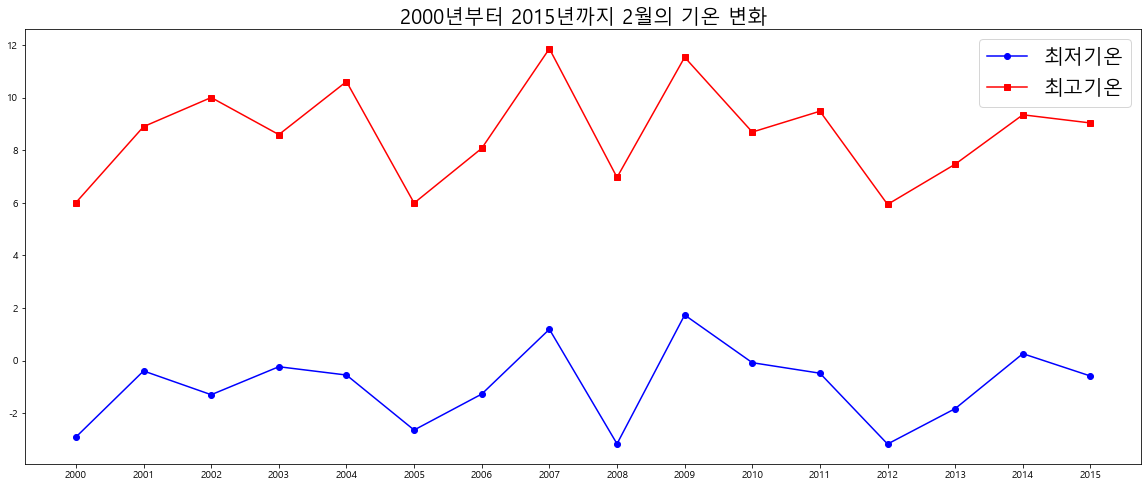

In [ ]:
print(f'{year_start}년부터 {year_end}년까지 {month_choice}월의 기온 변화')
print()
print(f'{month_choice}월의 최저 기온 평균:')

for i in list(df_input_low):
    if  i==list(df_input_low)[-1]:
        print(f'{round(i,1)} ' , end="") 
    else:
        print(f'{round(i,1)}, ' , end="") 
print()    
print(f'{month_choice}월의 최고 기온 평균:')

for i in list(df_input_high):
    if i==list(df_input_high)[-1]:
        print(f'{round(i,1)} ' , end="")
    else:
        print(f'{round(i,1)}, ' , end="")

# 그래프 그리기

plt.figure(figsize=(20, 8))

plt.plot(df_input_low, 'blue', marker='o', label='최저기온')
plt.plot(df_input_high, 'red', marker='s', label='최고기온')
plt.title(f'{year_start}년부터 {year_end}년까지 {month_choice}월의 기온 변화',fontsize=20)
plt.legend(fontsize=20)
plt.rc('axes',unicode_minus=False) # 마이너스 깨짐 방지 
plt.xticks(np.arange(year_start, year_end+1, step=1)) # x축 범위 및 간격 설정
plt.show()
